# Event Horizon Telescope (EHT) Data Analysis - Final Project Guidline

**Course:** Physics 434 - Data Analysis Lab  
**Dataset:** EHT M87 and 3C279 Radio Interferometry Data

## Introduction

The Event Horizon Telescope (EHT) is a global array of radio telescopes that achieved the first direct images of supermassive black holes. This notebook introduces you to real EHT data analysis using calibrated radio interferometry observations of:

- **M87**: Supermassive black hole that got taken the first picture of (6.5 billion solar masses) in galaxy M87
- **3C279**: Active galactic nucleus with relativistic jet

```Uncalibrated datasets```: All can be accessed [here](https://urldefense.com/v3/__https://www.dropbox.com/scl/fo/eaw61hh86gnktsi2rufve/AFPM_nNL2KrFjGXXKuzfI9E?rlkey=unt44162m8rr6fc9jquhg28aw&e=1&dl=0__;!!K-Hz7m0Vt54!k7N1SCQJ1Z695hwsvlwhMGUoFhB9imrculK5rz89r2wYXqs3xi3nqszO31Kg9nHrvhLpmXYqe6obHeWyU4ztrTZfctw$). The folder contains data for all sources observed by the EHT at the "low frequency" band on April 11, 2017. The files are in the standard uvfits format used in radio astronomy, and further details are provided in the included README file.

```Calibrated datasets```: [3C279](https://urldefense.com/v3/__https://datacommons.cyverse.org/browse/iplant/home/shared/commons_repo/curated/EHTC_First3C279Results_May2020/uvfits/SR1_3C279_2017_101_lo_hops_netcal_StokesI.uvfits__;!!K-Hz7m0Vt54!k7N1SCQJ1Z695hwsvlwhMGUoFhB9imrculK5rz89r2wYXqs3xi3nqszO31Kg9nHrvhLpmXYqe6obHeWyU4ztHy0qKy4$) and [M87](https://urldefense.com/v3/__https://datacommons.cyverse.org/browse/iplant/home/shared/commons_repo/curated/EHTC_FirstM87Results_Apr2019/uvfits/SR1_M87_2017_101_lo_hops_netcal_StokesI.uvfits__;!!K-Hz7m0Vt54!k7N1SCQJ1Z695hwsvlwhMGUoFhB9imrculK5rz89r2wYXqs3xi3nqszO31Kg9nHrvhLpmXYqe6obHeWyU4ztDr00wZU$) (the latter dataset corresponds to the first black hole shadow image).

For additional background on the EHT calibration process, you may find [Blackburn et al. (2019)](https://urldefense.com/v3/__https://iopscience.iop.org/article/10.3847/1538-4357/ab328d/pdf__;!!K-Hz7m0Vt54!k7N1SCQJ1Z695hwsvlwhMGUoFhB9imrculK5rz89r2wYXqs3xi3nqszO31Kg9nHrvhLpmXYqe6obHeWyU4ztQxljEgs$) especially helpful. The full caliberation process 

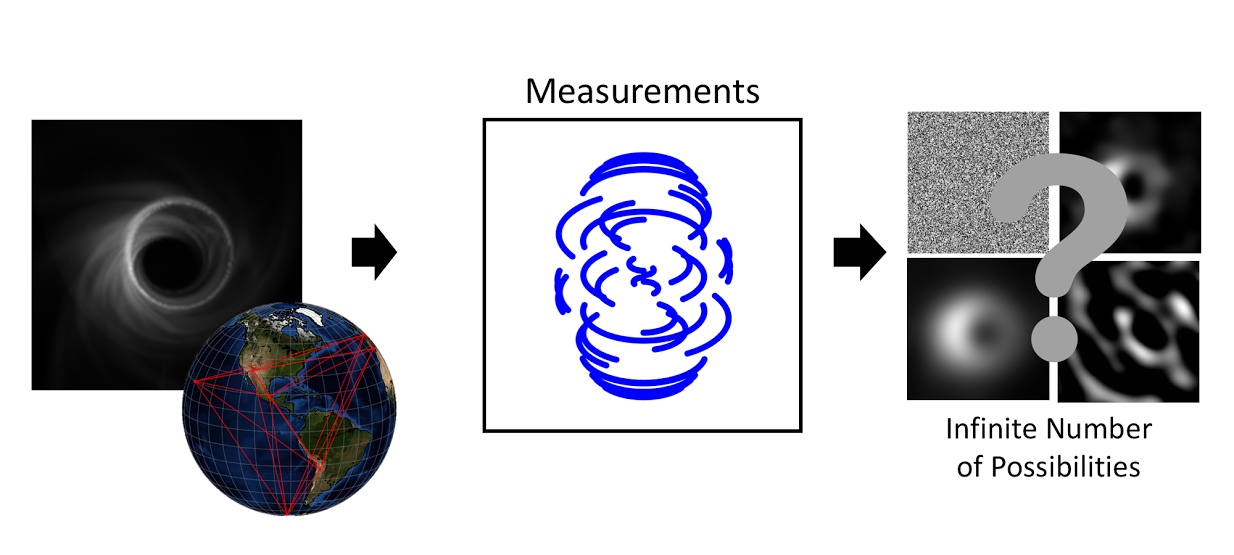
## Learning Objectives

If you choose this dataset for your final project, by the end, you will understand:
1. Radio interferometry data structure (UV-FITS format)
2. Basic visibility data analysis
3. Flux density measurements and uncertainties
4. Statistical methods for astronomical data
5. Preparation for advanced final projects

## Final Project Options Available

1. **Variability Analysis** - Time-domain statistics and chi-squared tests
2. **Spectral Energy Distribution** - Power-law fitting and maximum likelihood
3. **Closure Phase Analysis** - Phase calibration and systematic errors
4. **Source Size Estimation** - Model selection and confidence intervals  
5. **Signal Detection** - Substructure significance and look-elsewhere effect


## Installation Requirements

Before we start, you'll need the **EHT Analysis Toolkit (EAT)** for optimal UVFITS file handling and **astropy** for basic multiplications. 

📚 EAT Documentation: https://eat.readthedocs.io/ \
🐙 EAT GitHub: https://github.com/sao-eht/eat

```bash
# Install EAT library (recommended for EHT data)
pip install eat

# Or install from source for latest features:
git clone https://github.com/sao-eht/eat.git
cd eat
pip install -e .
```

**Why use EAT?**
- Specifically designed for EHT data calibration and analysis
- Handles UVFITS format complexities automatically  
- Provides clean data structures for visibility, amplitude, phase, and weights
- Includes built-in functions for common EHT analysis tasks
- Maintained by the EHT collaboration

*Note: You can always fall back to astropy if EAT is not available.*

## EHT Data at a Glance

### Understanding UV-FITS Format

Radio interferometry data is stored in UV-FITS format containing:
- **Visibilities**: Complex measurements of source brightness
- **UV coordinates**: Spatial frequencies sampled by telescope pairs
- **Time stamps**: When observations were made
- **Frequency information**: Observing wavelength
- **Calibration data**: Amplitude and phase corrections

You can use the following function to read in and explore UV-FITS format files:
```bash
import eat.io.fits as eht_fits

obs_cal = eht_fits.load_uvfits(calibrated_file)
print(f"Source: {obs_cal.source}")
print(f"Observation frequency: {obs_cal.rf/1e9:.1f} GHz")
print(f"Observation time: {obs_cal.mjd} MJD")
print(f"Number of data points: {len(obs_cal.data)}")
print(f"Data columns: {list(obs_cal.data.dtype.names)}")
```
Then, from ```obs_cal.data``` you can retrieve the radio interferometry data, whic measures **visibilities** (Visibility amplitude (Jy), Visibility phase (radians), Visibility uncertainty (Jy)) per **UV coordinate** ($G\lambda$).

Same file format and data organization go for uncaliberated data. An illustration of what radio interferometry data look like for both caliberated and uncaliberated data is shown below. You can tell that the caliberaed data has much **higher SNR** and **visibility amplitude** with less valid points.

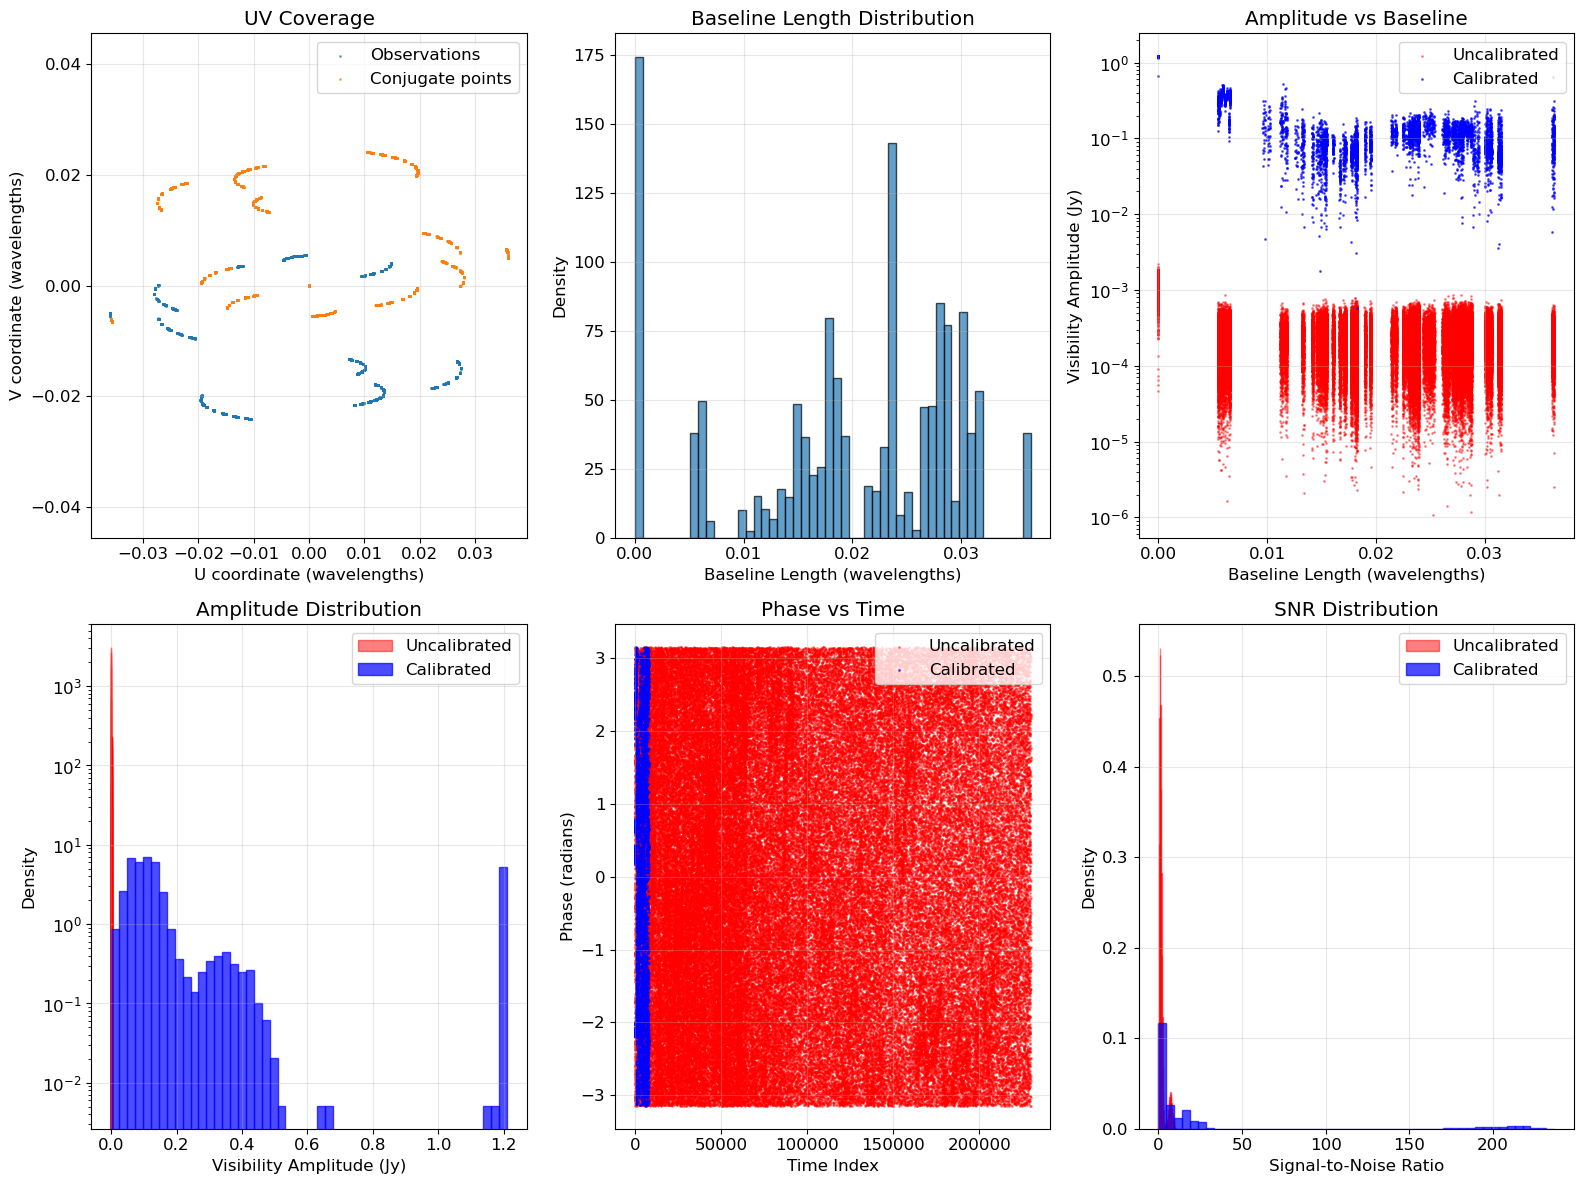

## Recommended Project Guidelines and Next Steps
### Available Final Projects

Based on this dataset, you can think about the following questions or design your own project, e.g. recreating any step from **3. Post-processing** of [the EHT caliberation paper](https://iopscience.iop.org/article/10.3847/1538-4357/ab328d/pdf).


#### **Variability Analysis and Time-Domain Statistics** 
**Recommended Steps:**
1. Load both M87 and 3C279 datasets and extract flux density measurements as a function of time during the observation period.
2. Calculate the weighted mean flux density and associated uncertainties for each source using proper error propagation techniques.
3. Perform chi-squared tests to determine if observed flux variations are statistically significant above measurement uncertainties.
4. Compare flux densities between M87 and 3C279 to understand source-specific variability patterns and validate measurement consistency across different black hole environments.
5. Generate light curves showing flux density versus time with appropriate error bars and confidence intervals.
6. Use Monte Carlo simulations to estimate uncertainties and validate your statistical conclusions about variability significance.
7. Provide physical interpretation of any detected variability in the context of black hole accretion physics and relativistic jet dynamics.

#### **Spectral Energy Distribution and Power-Law Modeling**
**Recommended Steps:**
1. Extract visibility amplitude data across available frequency channels for both M87 and 3C279 sources.
2. Calculate flux density as a function of frequency using proper calibration and error propagation methods.
3. Implement maximum likelihood estimation to fit power-law models (S ∝ ν^α) to the spectral energy distributions.
4. Use chi-squared minimization and likelihood ratio tests to determine optimal spectral indices and assess model goodness-of-fit.
5. Generate confidence intervals for spectral parameters using profile likelihood methods and bootstrap resampling.
6. Compare spectral properties between M87 and 3C279 to understand differences in emission mechanisms and source physics.
7. Validate results using cross-validation techniques and assess systematic uncertainties in spectral measurements.
8. Interpret spectral indices in terms of synchrotron emission models and relativistic plasma physics.

#### **Signal Detection and Reweighting** 
**Recommended Steps:**
1. Load both calibrated and uncalibrated datasets for the same source to perform direct comparison of data quality metrics.
2. Calculate and compare signal-to-noise ratios between raw and calibrated visibility measurements using appropriate statistical measures.
3. Analyze the statistical distributions of visibility amplitudes in both datasets using distribution fitting techniques and goodness-of-fit tests.
4. Characterize the transformation between uncalibrated and calibrated data by modeling the statistical relationship and identifying systematic patterns.
5. Develop optimal reweighting schemes using significance optimization methods similar to those applied in Lab 5 for improving data quality.
6. Implement threshold optimization algorithms to identify and handle outliers in both calibrated and uncalibrated datasets.
7. Create comprehensive plots comparing SNR distributions, visibility amplitude histograms, and calibration quality metrics.
8. Quantify the overall improvement in data reliability achieved through the EHT calibration pipeline using statistical validation methods.

## Getting Started with Your Project

1. **Choose your project** based on your interests and statistical comfort level
2. **Use this notebook** as your starting point - copy relevant sections
3. **Load additional datasets** if needed (3C279 data, multi-frequency observations)
4. **Implement the specific methods** outlined in your chosen project
5. **Validate your results** using the statistical tools provided above

### Required Deliverables (All Projects)

- **Analysis notebook** with clear explanations and well-commented code
- **Good visualization** with proper error bars and statistical information
- **Statistical validation** of your results using appropriate tests
- **Physical interpretation** connecting your statistical results to astrophysics
- **Discussion of limitations** and potential systematic effects

### Resources for Success

- **Course textbook**: Sections on chi-squared tests, maximum likelihood, confidence intervals
- **EAT Documentation**: https://eat.readthedocs.io/ - Comprehensive guide to EHT data analysis
- **EAT GitHub**: https://github.com/sao-eht/eat - Source code and examples
- **Astropy documentation**: For FITS file handling and coordinate transformations  
- **SciPy.stats**: For statistical distributions and hypothesis tests
- **EHT Collaboration papers**: For physical context and methodology validation
  - M87 Event Horizon Telescope results: https://eventhorizontelescope.org/science
  - Technical papers on calibration and imaging methods https://iopscience.iop.org/article/10.3847/1538-4357/ab328d/pdf 

### Additional EAT Features for Advanced Projects

If using EAT, consider these advanced capabilities:
- **Closure quantities**: `obs.closure_phase()`, `obs.closure_amplitude()`
- **Data averaging**: `obs.avg_coherent()`, `obs.avg_incoherent()`
- **Flagging operations**: `obs.flag_uvdist()`, `obs.flag_snr()`
- **Export functions**: `obs.save_uvfits()`, `obs.save_txt()`

Good luck with your final project! 🌟